In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv("heart_disease_uci.csv")

In [4]:
data.shape

(920, 16)

data.head()

In [5]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


##  Data Cleaning & Preprocessing

### 1.1 Handling Missing Data:
let's have a look at the original dataset and see if there is some missing values.
If there is any missing values in some patient's record, we will drop the record altogether. 
Now we can simply drop the rows with missing values and we have a good amount of data. 
Now we will shuffle the dataset in order to have a uniform distribution when we split them into train and test dataset.

In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

trestbps 0.0641  % missing values
chol 0.0326  % missing values
fbs 0.0978  % missing values
restecg 0.0022  % missing values
thalch 0.0598  % missing values
exang 0.0598  % missing values
oldpeak 0.0674  % missing values
slope 0.3359  % missing values
ca 0.6641  % missing values
thal 0.5283  % missing values


In [7]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
median=data['oldpeak'].median()
data['oldpeak'].replace(np.NaN,median,inplace=True)

In [10]:
#knn=KNNImputer()
#df=knn.fit_transform(data[['oldpeak','ca','trestbps','chol','thalch']])

In [11]:
#df=pd.DataFrame(df)

In [12]:
#df.columns=['oldpeak','ca','trestbps','chol','thalch']

In [13]:
#df.isna().sum()

In [14]:
#data[['oldpeak','ca','trestbps','chol','thalch']]=df[['oldpeak','ca','trestbps','chol','thalch']]

In [15]:
#data.isna().sum()

In [16]:
#num=[features for features in data.columns if data[features].isnull().sum()>1 and data[features].dtypes=='float']
#num

In [17]:
median=data['ca'].median()
data['ca'].replace(np.NaN,median,inplace=True)

In [18]:
median=data['trestbps'].median()
data['trestbps'].replace(np.NaN,median,inplace=True)

In [19]:
mean=data['chol'].median()
data['chol'].replace(np.NaN,mean,inplace=True)

In [20]:
mean=data['thalch'].median()
data['thalch'].replace(np.NaN,mean,inplace=True)

In [21]:
features_cat_na=[features for features in data.columns if data[features].isnull().sum()>1 and data[features].dtypes=='O']
features_cat_na

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [22]:
df1=data[['fbs', 'restecg', 'exang', 'slope', 'thal']]
df1.isnull().mean()

fbs        0.097826
restecg    0.002174
exang      0.059783
slope      0.335870
thal       0.528261
dtype: float64

In [23]:
for column in ['fbs', 'restecg', 'exang', 'slope', 'thal'] :

 data[column].fillna(data[column].mode()[0], inplace=True)


In [24]:
df1.columns

Index(['fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [25]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [26]:
data.head(20)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [27]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [28]:
data.describe(include=[np.object])

,sex,dataset,cp,restecg,slope,thal
count,920,920,920,920,920,920
unique,2,4,4,3,3,3
top,Male,Cleveland,asymptomatic,normal,flat,normal
freq,726,304,496,553,654,682


In [29]:
data['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [30]:
data['num'] = ((data['num'] > 0)*1) ## Converting num to dummy variable

In [31]:
data['num'].value_counts()


1    509
0    411
Name: num, dtype: int64

In [32]:
# It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.
data.rename(columns={'num':'target'},inplace=True)

In [33]:
data=data.drop(['dataset','id','thal'],axis=1) #dropping ca and thal because it contains more than 50% missing data

In [34]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,0


In [35]:
data['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [36]:
data['restecg'].value_counts()

normal              553
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [37]:
data['fbs'].value_counts()

False    782
True     138
Name: fbs, dtype: int64

In [38]:
data['exang'].value_counts()

False    583
True     337
Name: exang, dtype: int64

In [39]:
data_tmp = data[['age','sex','cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak','slope','ca', 'target']].copy()
data_tmp['sex'] = (data['sex'] == 'Male')*1
data_tmp['fbs'] = (data['fbs'])*1
data_tmp['exang'] = (data['exang'])*1

data_tmp.columns = [ 'age','sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar','resting_electrocardiographic _results',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression','st_slope_type','calcium','target']
data_tmp.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic _results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,calcium,target
0,63,1,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,0
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,1
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,1
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,0
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,0
5,56,1,atypical angina,120.0,236.0,0,normal,178.0,0,0.8,upsloping,0.0,0
6,62,0,asymptomatic,140.0,268.0,0,lv hypertrophy,160.0,0,3.6,downsloping,2.0,1
7,57,0,asymptomatic,120.0,354.0,0,normal,163.0,1,0.6,upsloping,0.0,0
8,63,1,asymptomatic,130.0,254.0,0,lv hypertrophy,147.0,0,1.4,flat,1.0,1
9,53,1,asymptomatic,140.0,203.0,1,lv hypertrophy,155.0,1,3.1,downsloping,0.0,1


In [40]:
# MALE =1 AND FEMALE =0
# True=1 AND FALSE=0
data = pd.get_dummies(data_tmp, drop_first=True)
data

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,calcium,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,resting_electrocardiographic _results_normal,resting_electrocardiographic _results_st-t abnormality,st_slope_type_flat,st_slope_type_upsloping
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,0,0,1,0,0,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,1,0,0,0,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,0,0,0,0,0,1,0
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,0,1,0,1,0,0,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1,154.0,0,0.0,0.0,1,0,0,0,0,1,1,0
916,62,1,130.0,139.0,0,140.0,0,0.5,0.0,0,0,0,1,0,1,1,0
917,55,1,122.0,223.0,1,100.0,0,0.0,0.0,1,0,0,0,0,1,1,0
918,58,1,130.0,385.0,1,140.0,0,0.5,0.0,0,0,0,0,0,0,1,0


In [41]:
data.shape

(920, 17)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   age                                                     920 non-null    int64  
 1   sex                                                     920 non-null    int32  
 2   resting_blood_pressure                                  920 non-null    float64
 3   cholesterol                                             920 non-null    float64
 4   fasting_blood_sugar                                     920 non-null    int32  
 5   max_heart_rate_achieved                                 920 non-null    float64
 6   exercise_induced_angina                                 920 non-null    int32  
 7   st_depression                                           920 non-null    float64
 8   calcium                                 

In [43]:
data.describe()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,calcium,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,resting_electrocardiographic _results_normal,resting_electrocardiographic _results_st-t abnormality,st_slope_type_flat,st_slope_type_upsloping
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,131.995652,199.908696,0.150000,137.692391,0.366304,0.853261,0.227174,0.553261,0.189130,0.221739,0.050000,0.601087,0.194565,0.710870,0.220652
std,9.424685,0.408148,18.451300,109.040171,0.357266,25.145235,0.482056,1.058049,0.628936,0.497426,0.391825,0.415642,0.218063,0.489941,0.396081,0.453605,0.414912
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,177.750000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,140.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EXPLORARTORY DATA ANALYSIS

### DISTRIBUTION OF HEART DISEASE(TARGET VARIABLE)

[Text(0.5, 1.0, 'No. of Heart Disease patients in Dataset')]

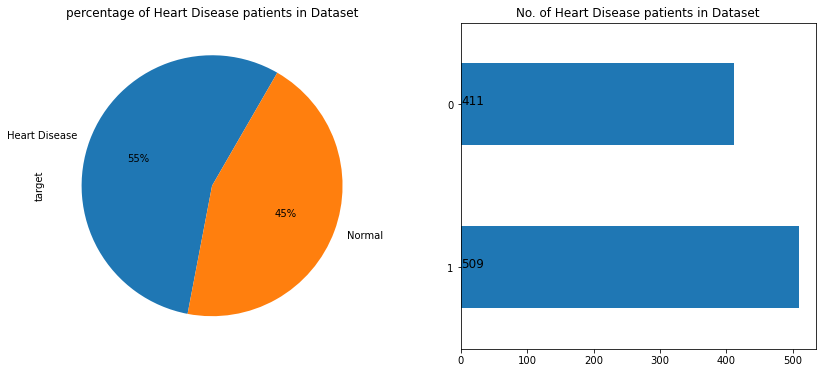

In [44]:
fig,(ax1, ax2)= plt.subplots(nrows=1,ncols=2,sharey=False, figsize=(14,6))
ax1=data['target'].value_counts().plot.pie(x='Heart disease',y='no. of patients',autopct='%1.0f%%',labels=['Heart Disease','Normal'],startangle=60,ax=ax1)
ax1.set(title='percentage of Heart Disease patients in Dataset')
ax2=data['target'].value_counts().plot(kind='barh',ax=ax2)
for i,j in enumerate (data['target'].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title='No. of Heart Disease patients in Dataset')

#### The dataset is balanced having 509 heart disease patients and 411 normal patients

### CHECKING GENDER AND AGEWISE DISTRIBUTION

Text(0.5, 1.0, 'Age of Distribution')

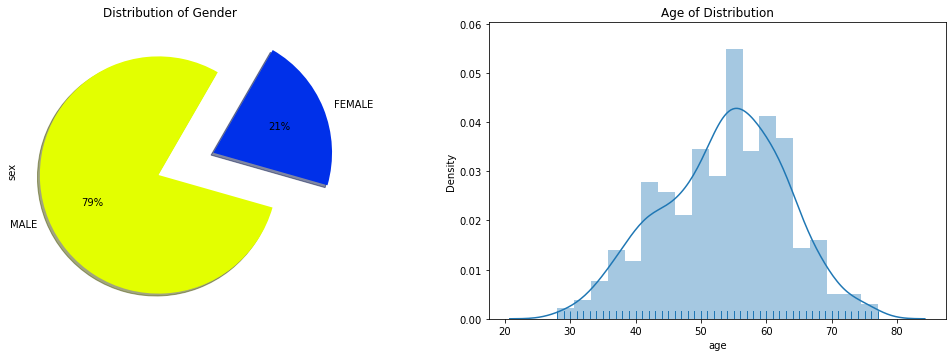

In [45]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
data['sex'].value_counts().plot.pie(autopct='%1.0f%%',labels=['MALE','FEMALE'],startangle=60,colors=sns.color_palette('prism',30),explode=[.1,.4],shadow=True)
plt.title('Distribution of Gender')
plt.subplot(2,2,2)
ax=sns.distplot(data['age'],rug=True)
plt.title('Age of Distribution')

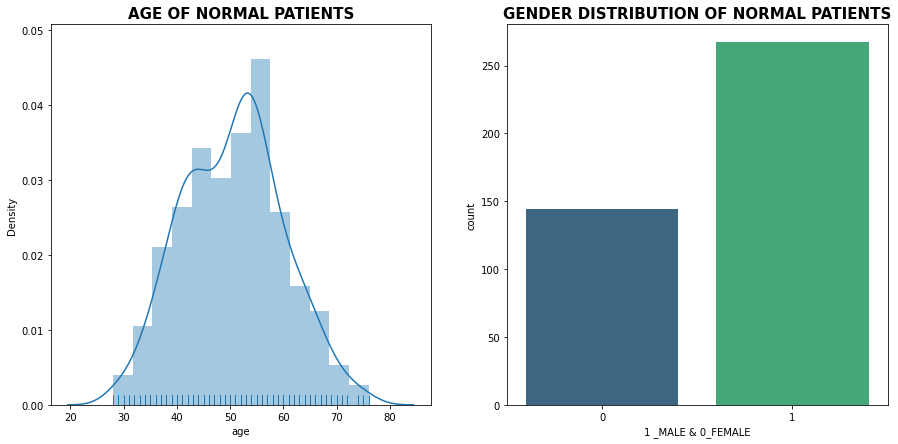

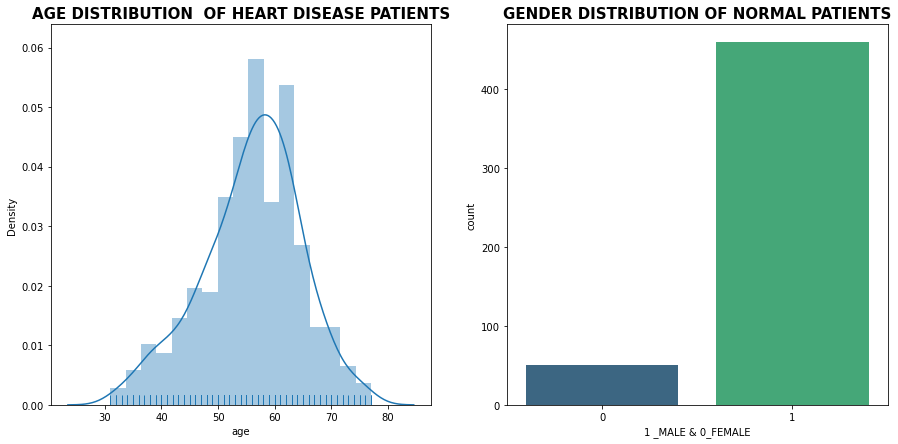

In [46]:
# creating separate dataframe for normal and heart disease patients
attr_1=data[data['target']==1]
attr_0 =data[data['target']==0]
# plotting for normal patients
fig=plt.figure(figsize=(15,7))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'],rug=True) # attr_0['age'] considering all ages of target variable 0
plt.title('AGE OF NORMAL PATIENTS',fontsize=15,weight='bold')
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'],palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS',fontsize=15,weight='bold')
plt.xlabel('1 _MALE & 0_FEMALE')
plt.show()
# plotting for Heart Disease patients
fig=plt.figure(figsize=(15,7))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'],rug=True) # attr_1['age'] considering all ages of target variable 1
plt.title('AGE DISTRIBUTION  OF HEART DISEASE PATIENTS',fontsize=15,weight='bold')
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'],palette='viridis')
plt.xlabel('1 _MALE & 0_FEMALE')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS',fontsize=15,weight='bold')
plt.show()

## DISTRIBUTION OF CHEST PAIN TYPE

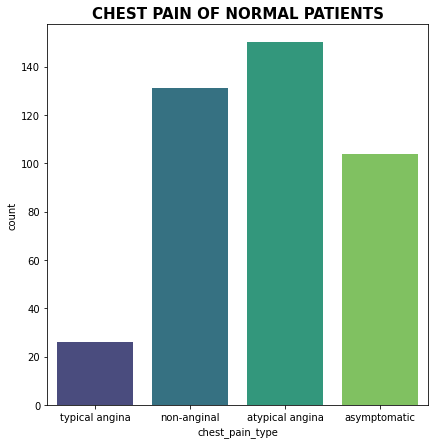

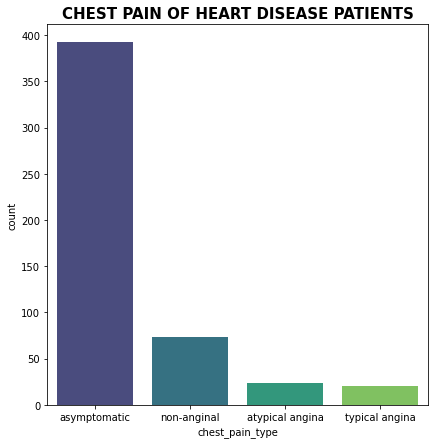

In [47]:
attr_T=data_tmp[data_tmp['target']==1]
attr_F =data_tmp[data_tmp['target']==0]
fig=plt.figure(figsize=(15,7))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_F['chest_pain_type'],palette='viridis')
plt.title('CHEST PAIN OF NORMAL PATIENTS',fontsize=15,weight='bold')
plt.show()
fig=plt.figure(figsize=(15,7))
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_T['chest_pain_type'],palette='viridis')
plt.title('CHEST PAIN OF HEART DISEASE PATIENTS',fontsize=15,weight='bold')
plt.show()

In [48]:
## Exploring the heart disease patients based on chest pain type
cm=sns.light_palette('red',as_cmap=True)
( round(pd.crosstab(data_tmp['chest_pain_type'],data_tmp['target'],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

target,0,1
chest_pain_type,,
asymptomatic,25.300000,77.010000
atypical angina,36.500000,4.720000
non-anginal,31.870000,14.340000
typical angina,6.330000,3.930000


### DISTRIBUTION OF REST ECG

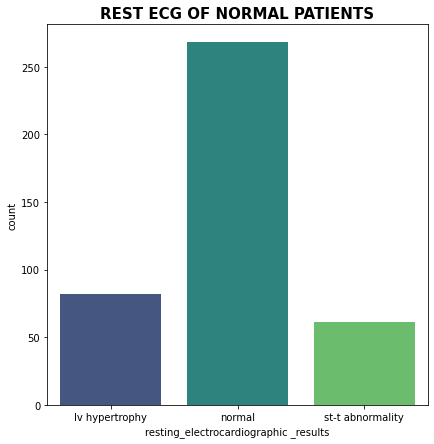

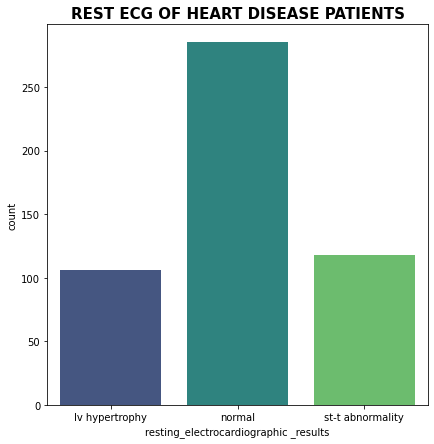

In [49]:
attr_T=data_tmp[data_tmp['target']==1]
attr_F =data_tmp[data_tmp['target']==0]
fig=plt.figure(figsize=(15,7))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_F['resting_electrocardiographic _results'],palette='viridis')
plt.title('REST ECG OF NORMAL PATIENTS',fontsize=15,weight='bold')
plt.show()
fig=plt.figure(figsize=(15,7))
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_T['resting_electrocardiographic _results'],palette='viridis')
plt.title('REST ECG OF HEART DISEASE PATIENTS',fontsize=15,weight='bold')
plt.show()

In [50]:
## Exploring the heart disease patients based on REST ECG
cm=sns.light_palette('blue',as_cmap=True)
( round(pd.crosstab(data_tmp['resting_electrocardiographic _results'],data_tmp['target'],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

target,0,1
resting_electrocardiographic _results,,
lv hypertrophy,19.950000,20.830000
normal,65.210000,55.990000
st-t abnormality,14.840000,23.180000


### DISTRIBUTION OF NUMERICAL FEATURES

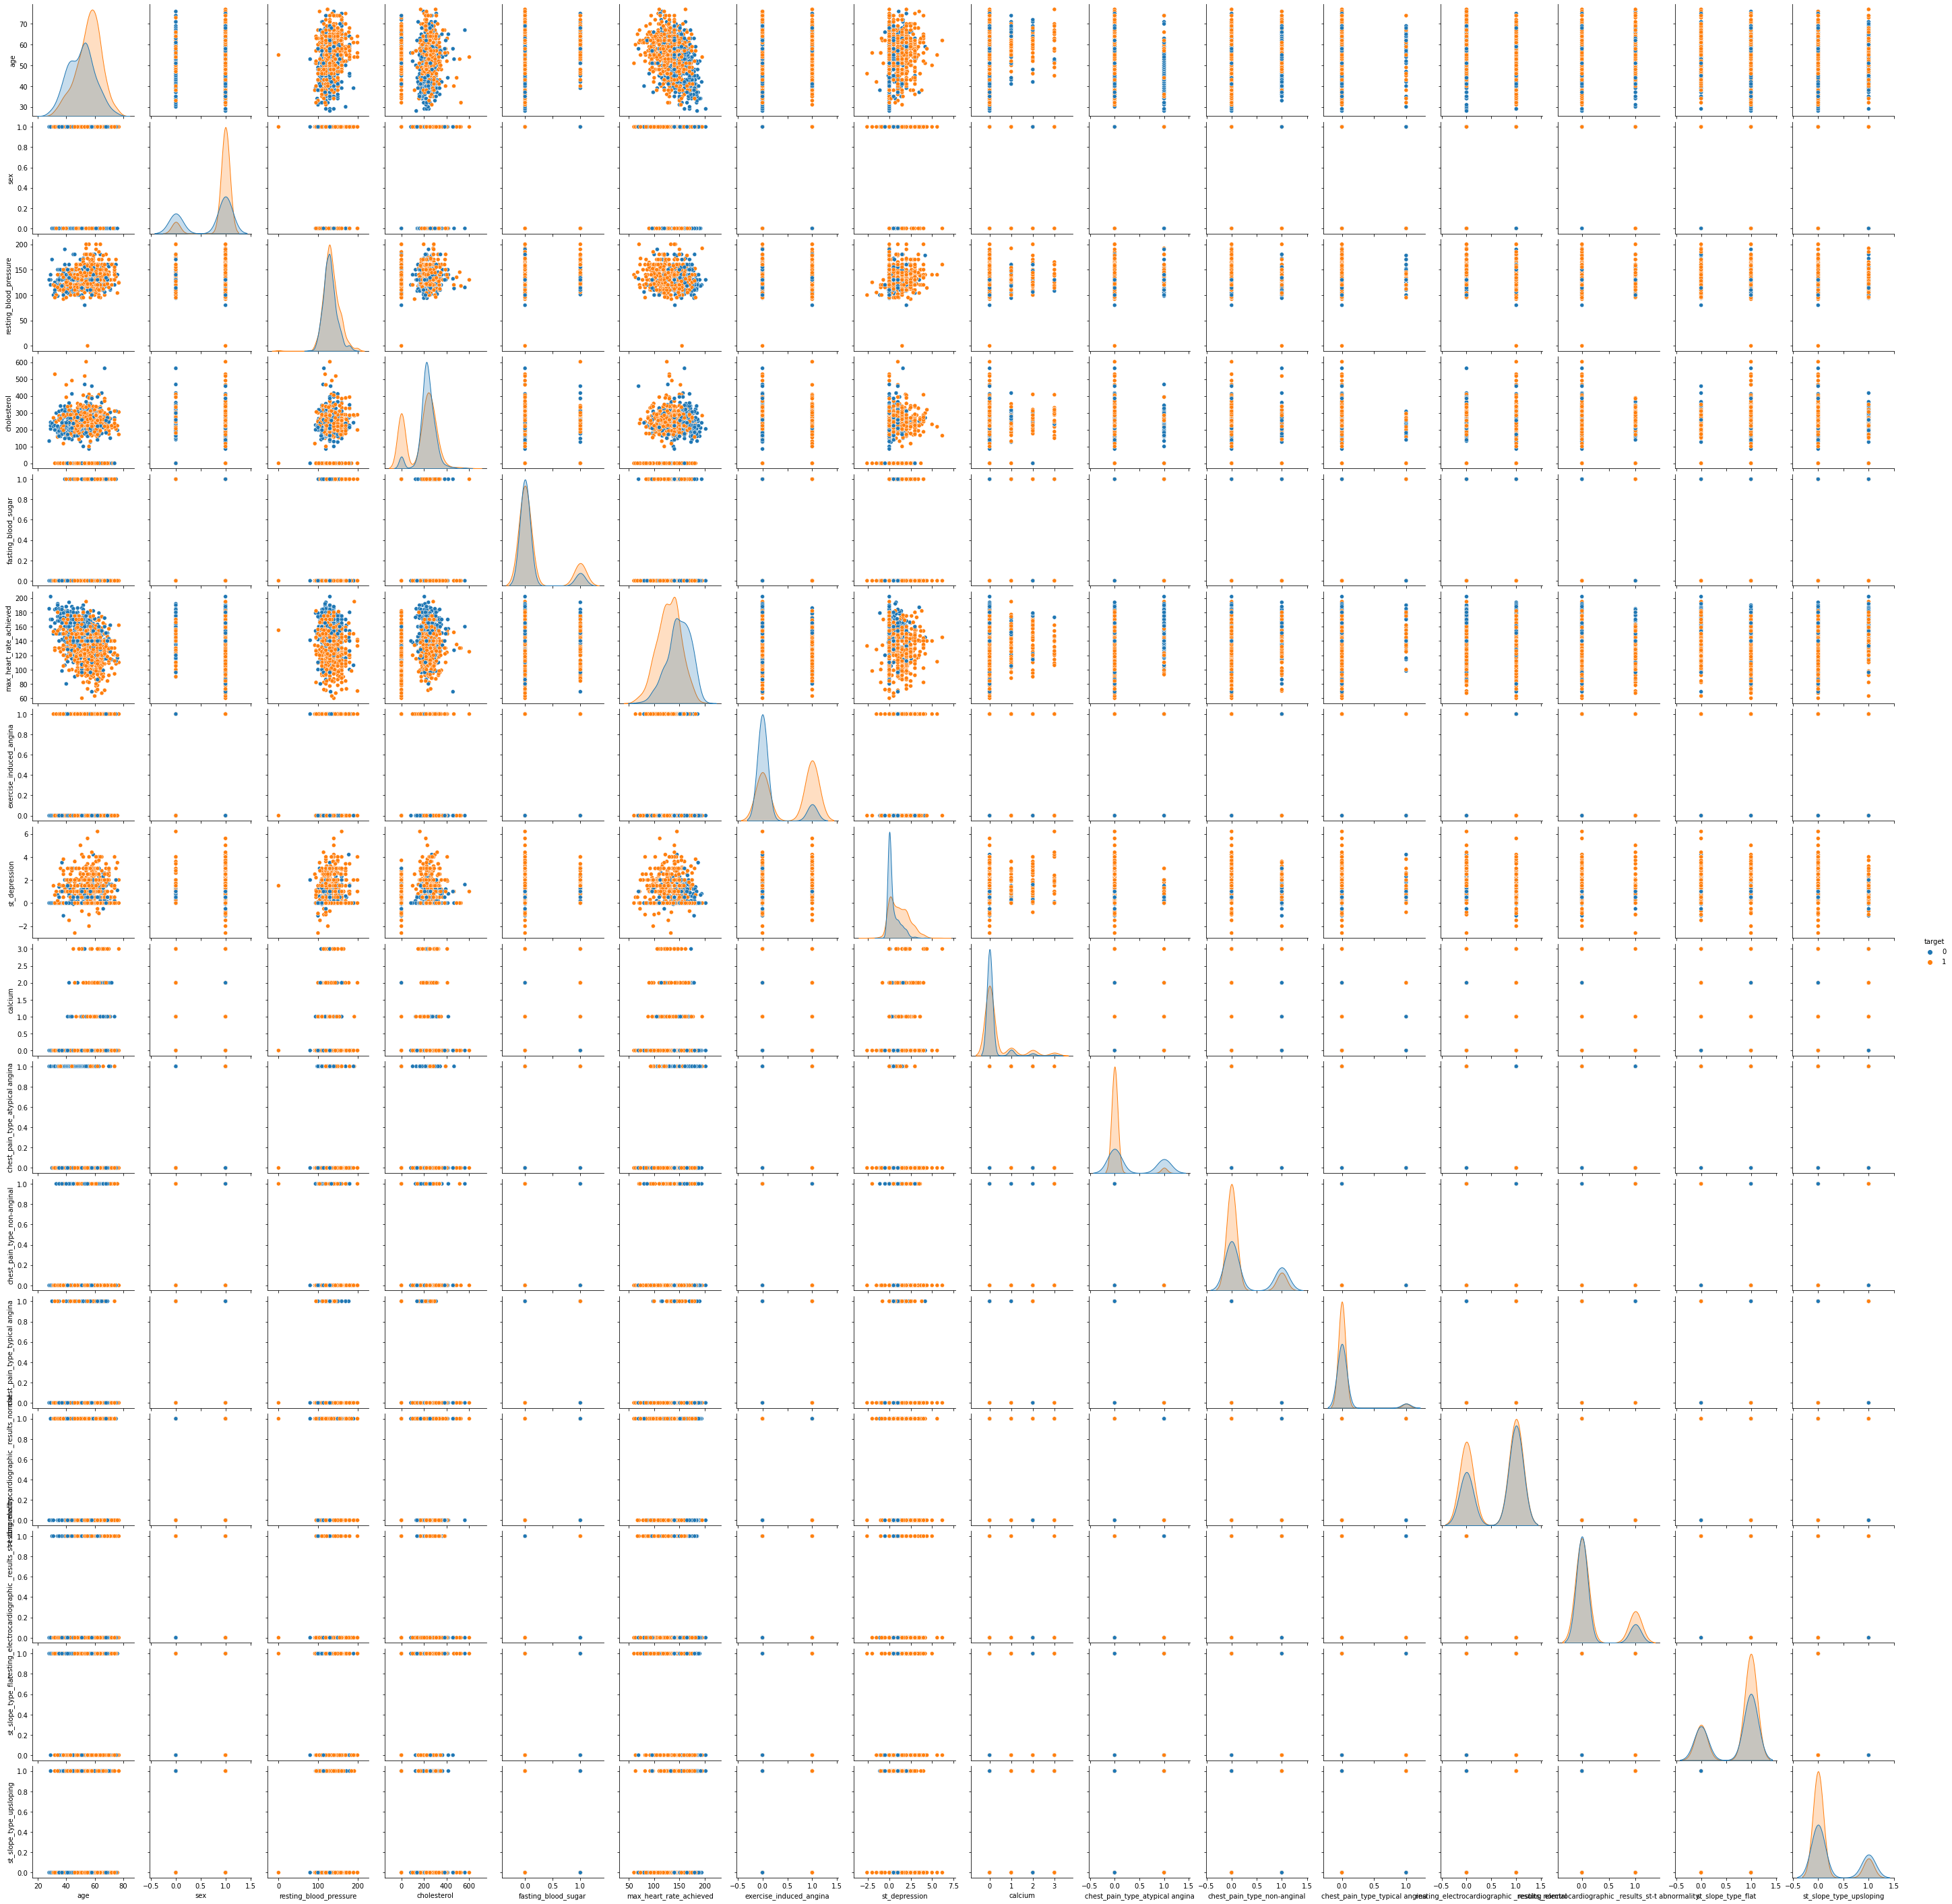

In [51]:
sns.pairplot(data,hue='target')

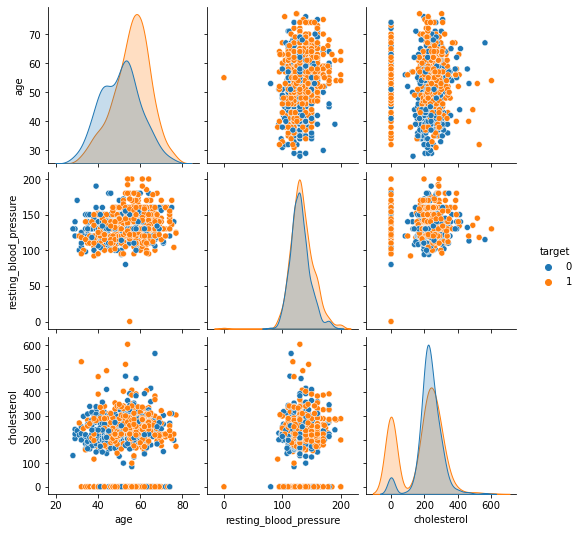

In [52]:

sns.pairplot(data,hue='target',vars = ['age','resting_blood_pressure','cholesterol'])

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

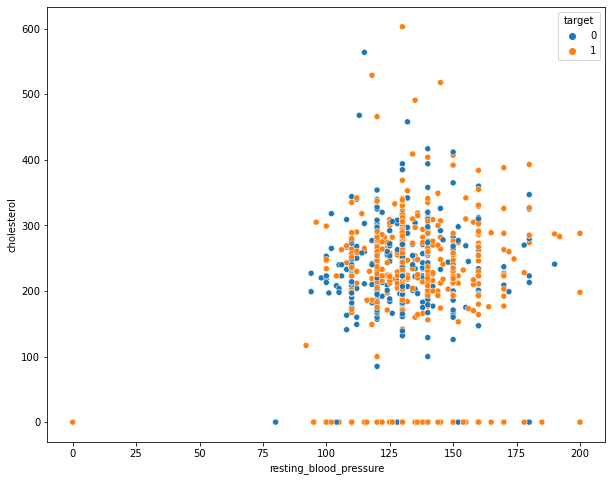

In [53]:
fig=plt.figure(figsize=(10,8))
sns.scatterplot(x='resting_blood_pressure',y='cholesterol',hue='target',data=data)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

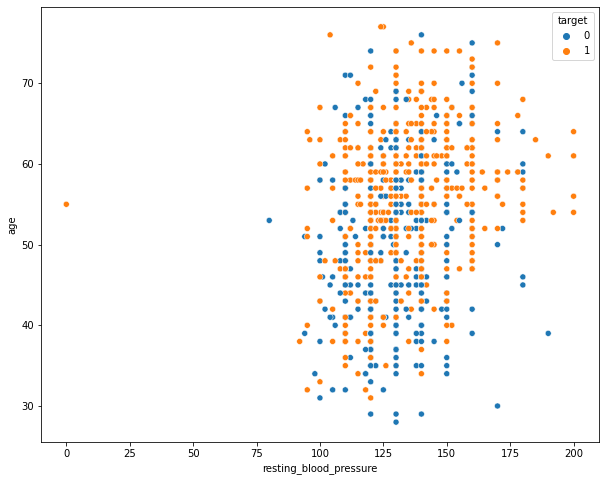

In [54]:
fig=plt.figure(figsize=(10,8))
sns.scatterplot(x='resting_blood_pressure',y='age',hue='target',data=data)

### OUTLIER DETECTION & REMOVAL

In [55]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = data[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [56]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,63,145.0,233.0,150.0
1,67,160.0,286.0,108.0
2,67,120.0,229.0,129.0
3,37,130.0,250.0,187.0
4,41,130.0,204.0,172.0


In [57]:
# calculating zscore of numeric columns in the dataset
#z = np.abs(stats.zscore(dt_numeric))
#print(z)

In [58]:
#type(z)

from these points it is diffciult to say which points are outliers so we will now define threshold

In [59]:
# Defining threshold for filtering outliers 
#threshold = 3
#print(np.where(z > 3))

In [60]:
Q1=dt_numeric.quantile(0.25)
Q3=dt_numeric.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age                        13.00
resting_blood_pressure     20.00
cholesterol                89.25
max_heart_rate_achieved    36.00
dtype: float64


 The first array contains the list of row numbers and second array respective column numbers, 
which mean z[126][1] have a Z-score higher than 3. There are total 12 data points which are outliers.

In [61]:
#filtering outliers retaining only those data points which are below threshhold
#data = data[(z < 3).all(axis=1)]

In [62]:
#data.shape

In [63]:
#data

In [64]:
data=data[~((data<(Q1-1.5*IQR))| (data>(Q3+1.5*IQR))).any(axis=1)]
data.shape

(715, 17)

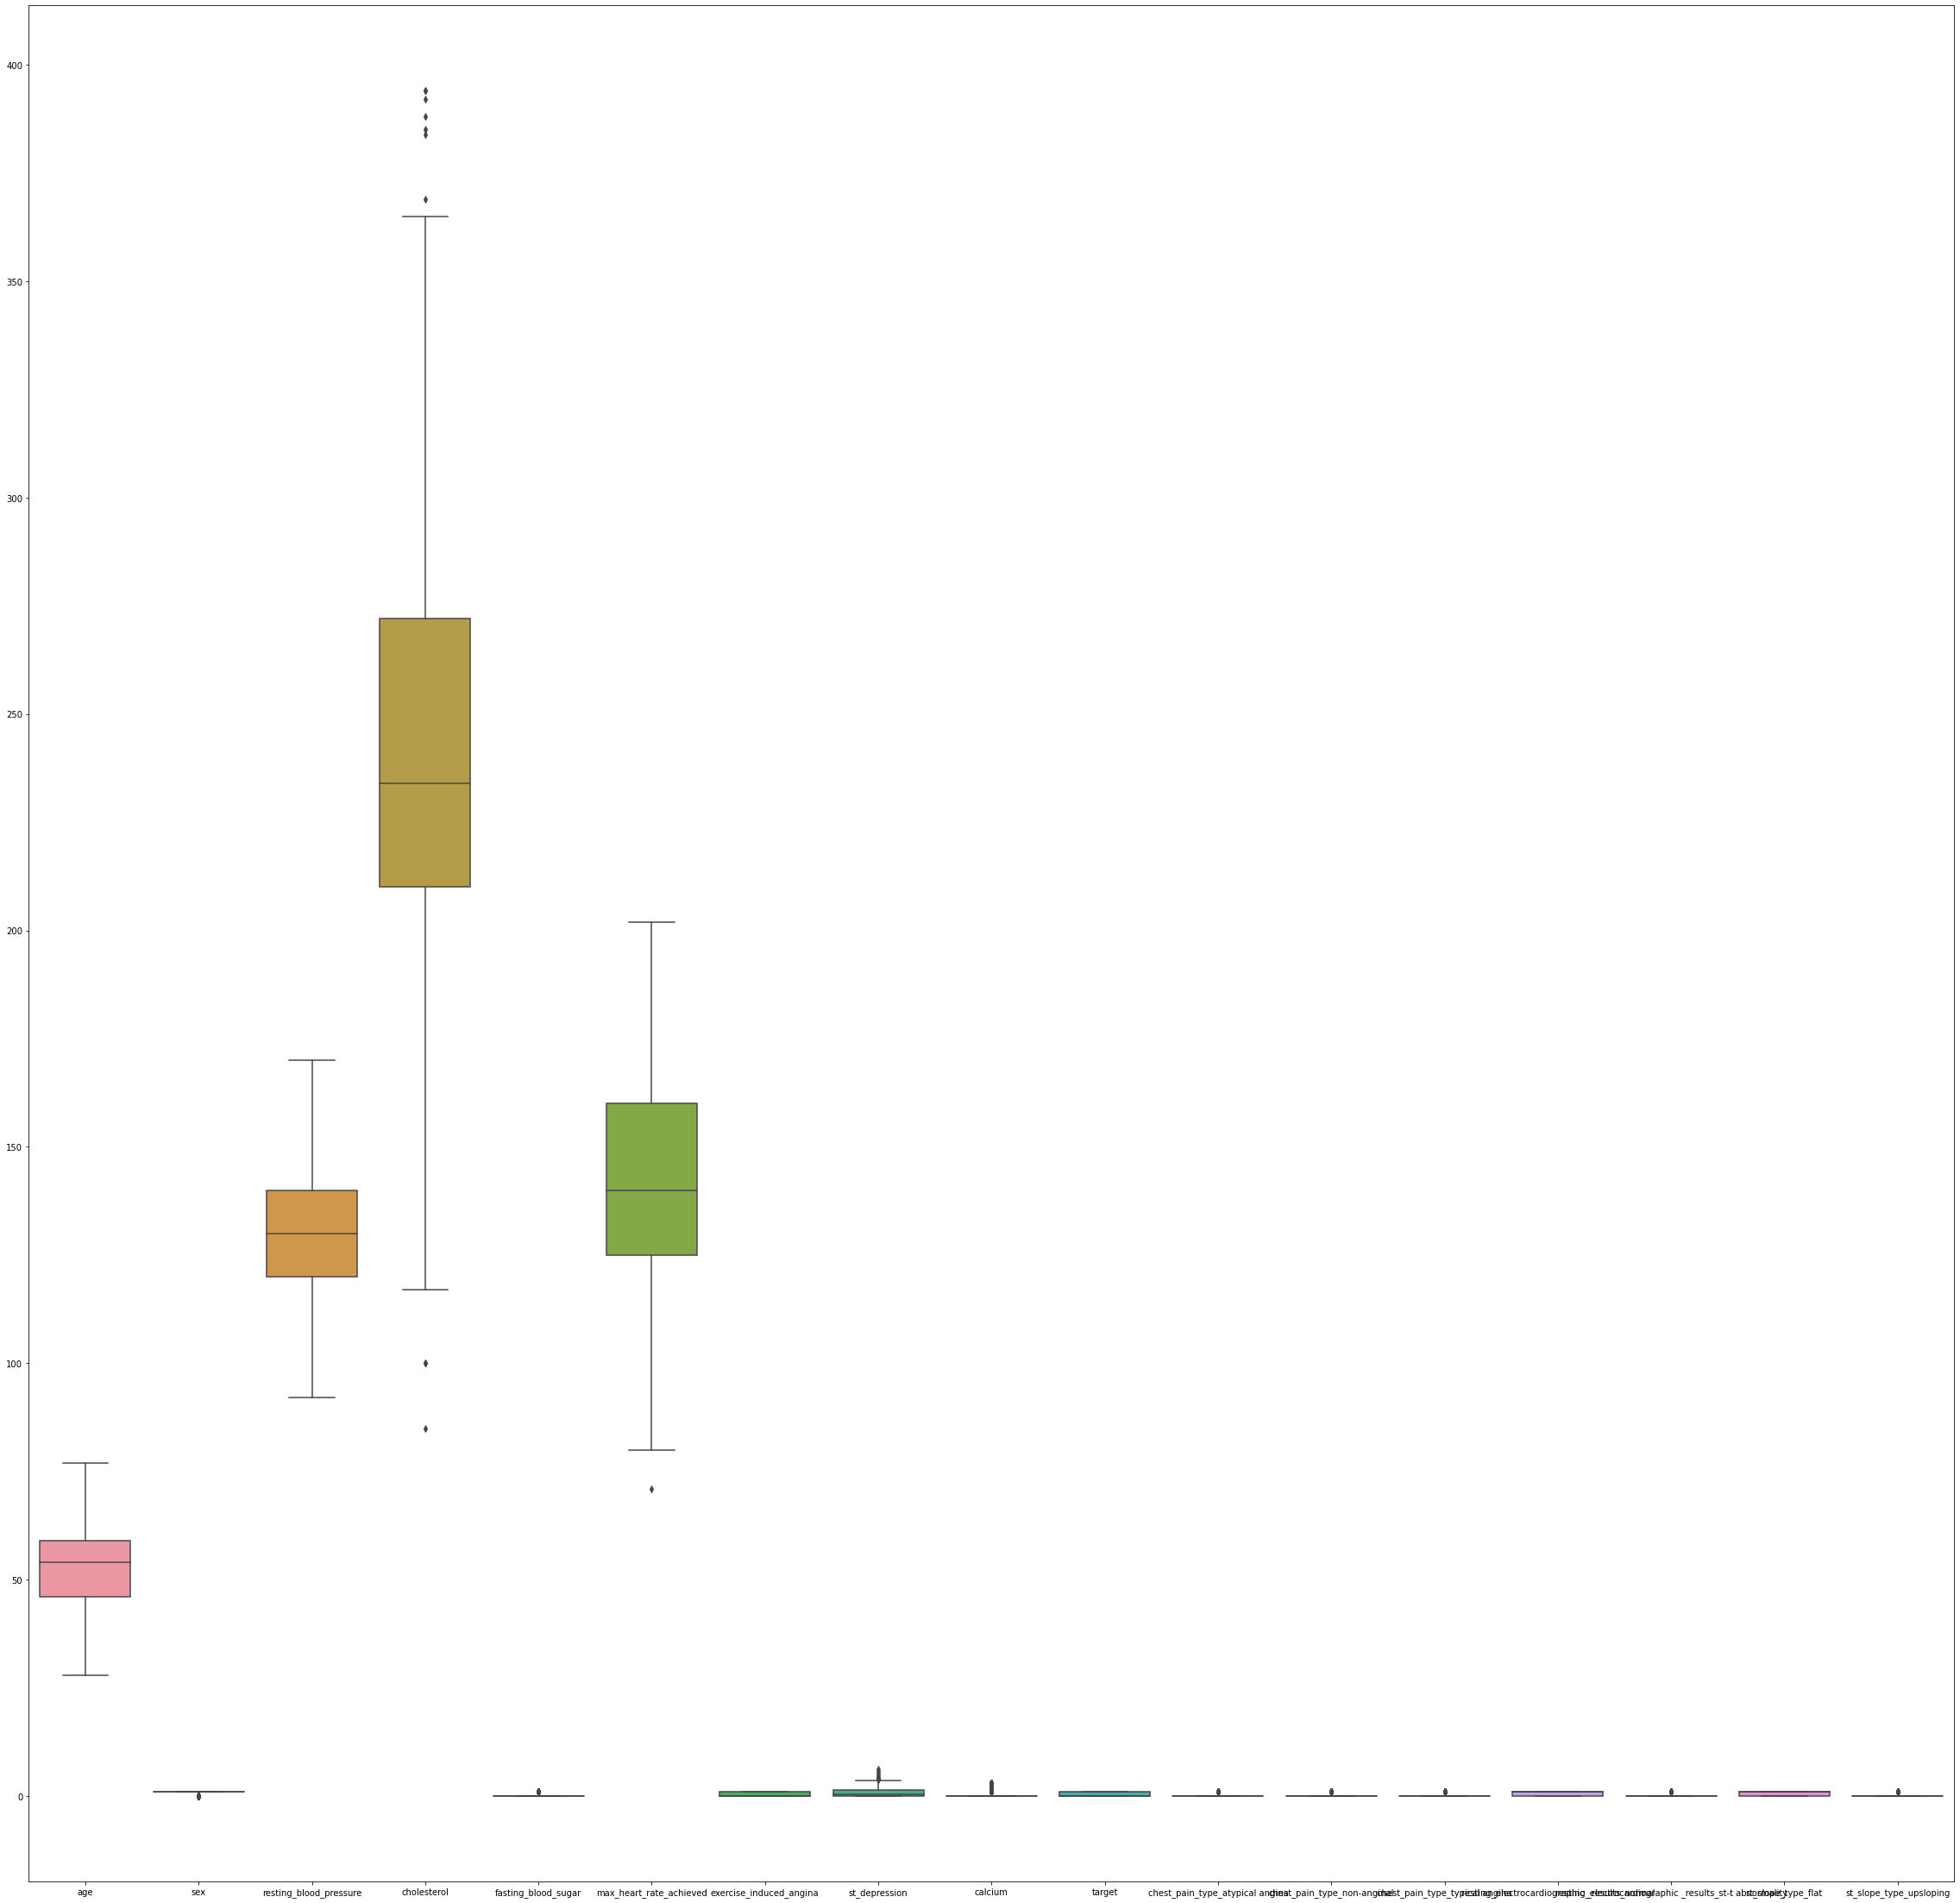

In [65]:
plt.figure(figsize=(40,40))
ax=sns.boxplot(data=data)

In [66]:
data.describe()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,calcium,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,resting_electrocardiographic _results_normal,resting_electrocardiographic _results_st-t abnormality,st_slope_type_flat,st_slope_type_upsloping
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,52.809790,0.762238,131.166434,241.000000,0.158042,141.253147,0.342657,0.854406,0.265734,0.471329,0.225175,0.229371,0.055944,0.597203,0.169231,0.721678,0.223776
std,9.543071,0.426011,15.322911,48.410274,0.365036,23.954941,0.474930,1.052311,0.673124,0.499527,0.417990,0.420722,0.229975,0.490804,0.375218,0.448486,0.417066
min,28.000000,0.000000,92.000000,85.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,120.000000,210.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,234.000000,0.000000,140.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,59.000000,1.000000,140.000000,272.000000,0.000000,160.000000,1.000000,1.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,170.000000,394.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# data.drop(['cholesterol'],axis=1)

In [68]:
# segregating dataset into features i.e., X and target variables i.e., y
X = data.drop(['target'],axis=1)
y = data['target']

In [69]:
X


,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,calcium,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,resting_electrocardiographic _results_normal,resting_electrocardiographic _results_st-t abnormality,st_slope_type_flat,st_slope_type_upsloping
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,0,1,0,0,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,0,0,0,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,0,0,0,0,0,1,0
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,1,0,1,0,0,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1,154.0,0,0.0,0.0,0,0,0,0,1,1,0
916,62,1,130.0,139.0,0,140.0,0,0.5,0.0,0,0,1,0,1,1,0
917,55,1,122.0,223.0,1,100.0,0,0.0,0.0,0,0,0,0,1,1,0
918,58,1,130.0,385.0,1,140.0,0,0.5,0.0,0,0,0,0,0,1,0


In [70]:
#corr = np.corrcoef(X, rowvar=0)  # correlation matrix
#>>> w, v = np.linalg.eig(corr)        # eigen values & eigen vectors
#>>> w

### Normalization
Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. Standardization is also used on a feature-wise basis in most cases. Normalization is done by the following formula.

 Xscaled=(X−Xmin)/(Xmax−Xmin)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,calcium,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,resting_electrocardiographic _results_normal,resting_electrocardiographic _results_st-t abnormality,st_slope_type_flat,st_slope_type_upsloping
0,0.714286,1,0.679487,0.478964,1,0.603053,0,0.370968,0.0,0,0,1,0,0,0,0
1,0.795918,1,0.871795,0.650485,0,0.282443,1,0.241935,3.0,0,0,0,0,0,1,0
2,0.795918,1,0.358974,0.466019,0,0.442748,1,0.419355,2.0,0,0,0,0,0,1,0
3,0.183673,1,0.487179,0.533981,0,0.885496,0,0.564516,0.0,0,1,0,1,0,0,0
4,0.265306,0,0.487179,0.385113,0,0.770992,0,0.225806,0.0,1,0,0,0,0,0,1


In [72]:
#v

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif_data=pd.DataFrame()
Vif_data['feature']=X.columns


In [74]:
Vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [75]:
Vif_data

,feature,VIF
0,age,9.149738
1,sex,4.254335
2,resting_blood_pressure,8.118647
3,cholesterol,10.746114
4,fasting_blood_sugar,1.325942
5,max_heart_rate_achieved,10.912303
6,exercise_induced_angina,2.388117
7,st_depression,2.638471
8,calcium,1.465311
9,chest_pain_type_atypical angina,1.972828


In [76]:
X1= X.drop(['st_slope_type_flat'],axis=1).copy()
X1

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,calcium,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,resting_electrocardiographic _results_normal,resting_electrocardiographic _results_st-t abnormality,st_slope_type_upsloping
0,0.714286,1,0.679487,0.478964,1,0.603053,0,0.370968,0.0,0,0,1,0,0,0
1,0.795918,1,0.871795,0.650485,0,0.282443,1,0.241935,3.0,0,0,0,0,0,0
2,0.795918,1,0.358974,0.466019,0,0.442748,1,0.419355,2.0,0,0,0,0,0,0
3,0.183673,1,0.487179,0.533981,0,0.885496,0,0.564516,0.0,0,1,0,1,0,0
4,0.265306,0,0.487179,0.385113,0,0.770992,0,0.225806,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.530612,0,0.448718,0.802589,1,0.633588,0,0.000000,0.0,0,0,0,0,1,0
916,0.693878,1,0.487179,0.174757,0,0.526718,0,0.080645,0.0,0,0,1,0,1,0
917,0.551020,1,0.384615,0.446602,1,0.221374,0,0.000000,0.0,0,0,0,0,1,0
918,0.612245,1,0.487179,0.970874,1,0.526718,0,0.080645,0.0,0,0,0,0,0,0


In [77]:
Vif_data=pd.DataFrame()
Vif_data['feature']=X1.columns

In [78]:
Vif_data['VIF']=[variance_inflation_factor(X1.values,i) for i in range(len(X1.columns))]

In [79]:
Vif_data

,feature,VIF
0,age,8.701093
1,sex,4.147527
2,resting_blood_pressure,7.942295
3,cholesterol,9.832369
4,fasting_blood_sugar,1.317525
5,max_heart_rate_achieved,9.660955
6,exercise_induced_angina,2.360964
7,st_depression,2.431044
8,calcium,1.448066
9,chest_pain_type_atypical angina,1.965400


<AxesSubplot:>

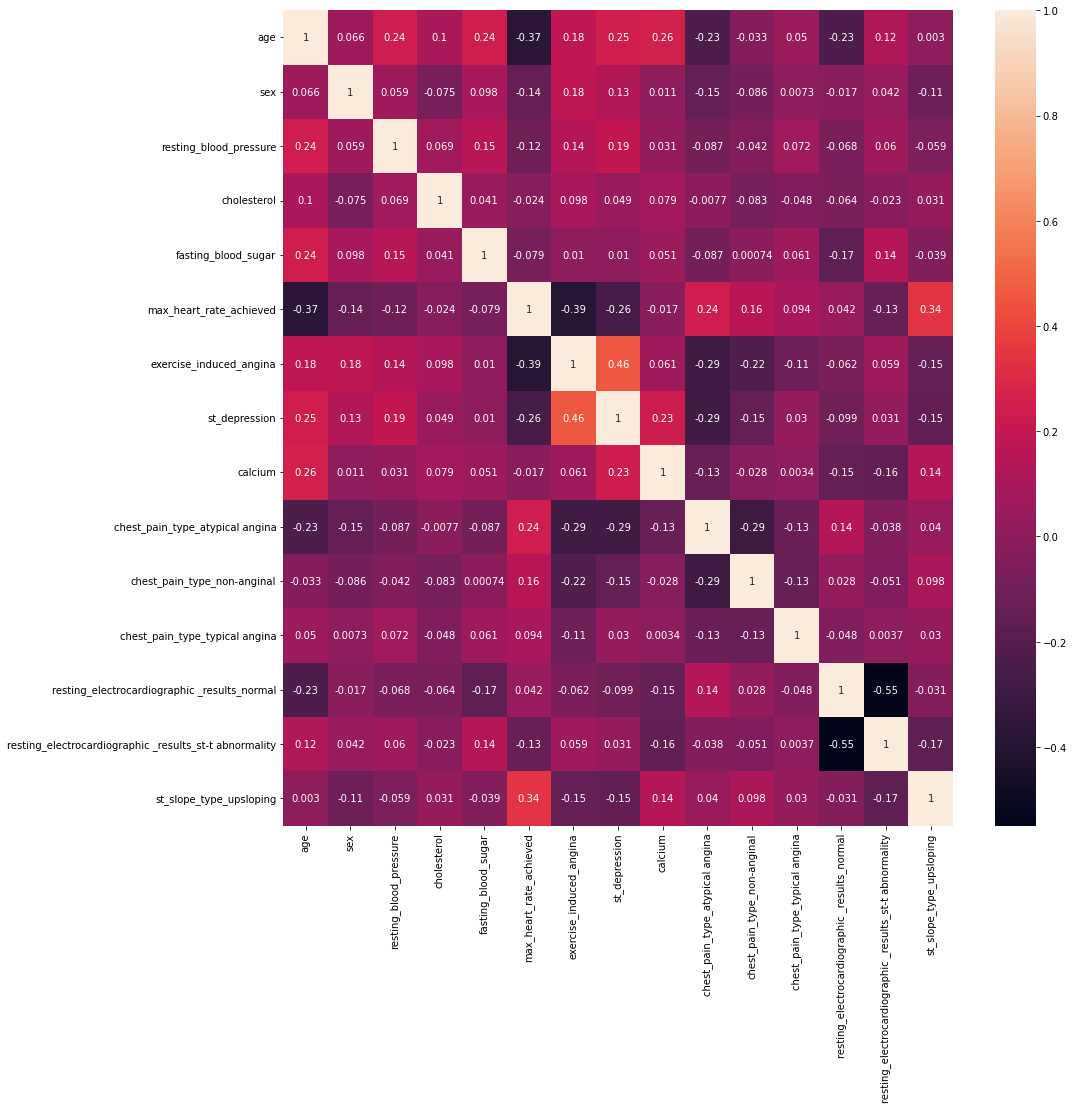

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(X1.corr(),annot=True )

### CHECKING CORRELATION

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

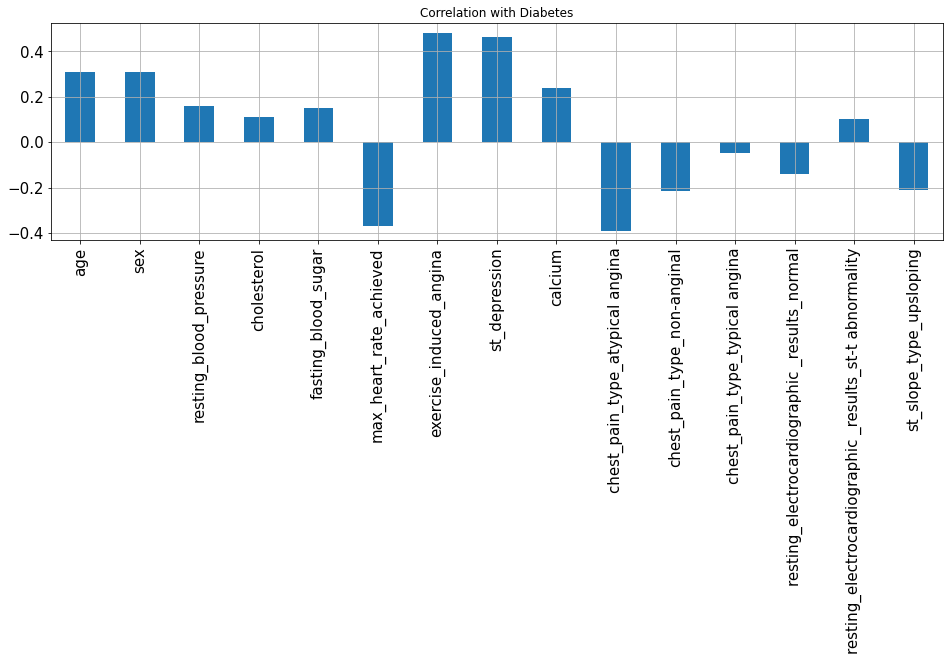

In [82]:
#Correlation with Response Variable class

X1.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [84]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
0    302
1    270
Name: target, dtype: int64
Distribution of traget variable in test set
0    76
1    67
Name: target, dtype: int64


In [85]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(572, 15)
(572,)
------------Test Set------------------
(143, 15)
(143,)


### Fitting Into the Regression Model

In [86]:
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

<AxesSubplot:>

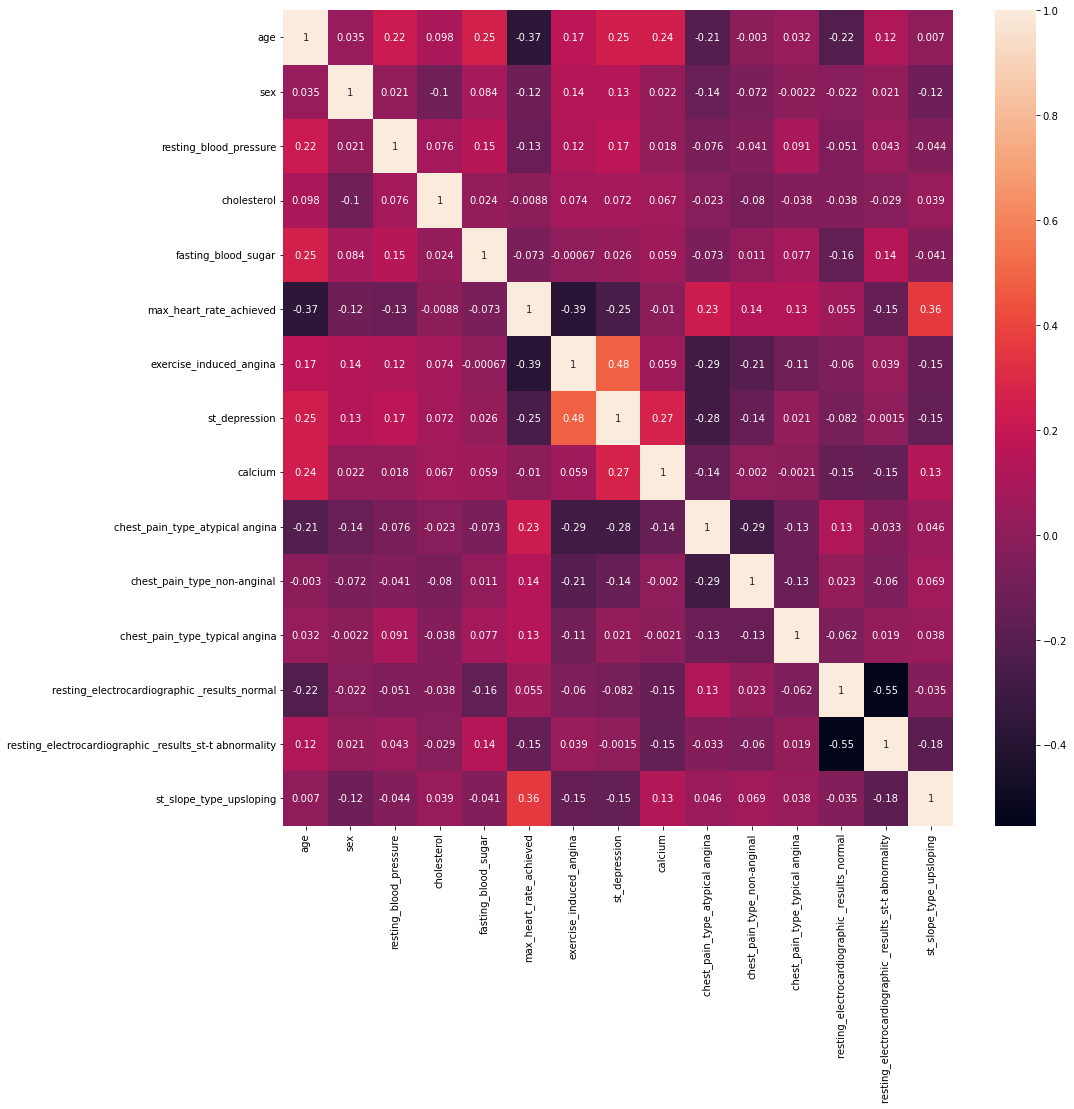

In [87]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True )

In [88]:
y_pred = logre.predict(X_test)

In [89]:
X_pred=logre.predict(X_train)

### Accuracy

In [90]:
from sklearn.metrics import accuracy_score
print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))

The Accuracy Score is:  0.9020979020979021


In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
accuracy_score(y_test,y_pred_knn)

0.8531468531468531

In [94]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=1,
 weights='uniform')
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8671328671328671

In [95]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred_xgb)

0.7972027972027972

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        76
           1       0.91      0.88      0.89        67

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



In [99]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred_rfe)

0.8531468531468531

In [186]:
from sklearn.svm import SVC
#support Vector Machine
classifier=SVC(kernel='rbf',random_state=0,probability =True)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [187]:
from sklearn import metrics
print('Accuracy of svm:' )
print(metrics.accuracy_score(y_test,y_pred))

Accuracy of svm:
0.8741258741258742


In [188]:
from sklearn.metrics import roc_curve ,auc,roc_auc_score 


In [189]:
# prediction probabilities
r_probs =[0 for _ in range (len(y_test))]
rfe_prob=rf_ent.predict_proba(X_test)
xgb_prob=xgb.predict_proba(X_test)
knn_prob= knn_classifier.predict_proba(X_test)
lr_prob = logre.predict_proba(X_test)
svm_prob=classifier.predict_proba(X_test)

In [190]:
rfe_prob=rfe_prob[:,1]
xgb_prob=xgb_prob[:,1]
knn_prob=knn_prob[:,1]
lr_prob=lr_prob[:,1]
svm_prob=svm_prob[:,1]

In [191]:
# calculate AUCROC
rf_auc=roc_auc_score(y_test,rfe_prob)
xgb_auc=roc_auc_score(y_test,xgb_prob)
knn_auc=roc_auc_score(y_test,knn_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
svm_auc=roc_auc_score(y_test,svm_prob)

In [192]:
print ('Random forest :AUC_ROC =%0.3f'% rf_auc)
print ('xgboost :AUC_ROC =%0.3f'% xgb_auc)
print ('knn classifier :AUC_ROC =%0.3f'% knn_auc)
print ('logistic Regression :AUC_ROC =%0.3f'% lr_auc)
print('svm :AUC_ROC =%0.3f'% svm_auc)

Random forest :AUC_ROC =0.940
xgboost :AUC_ROC =0.901
knn classifier :AUC_ROC =0.924
logistic Regression :AUC_ROC =0.956
svm :AUC_ROC =0.953


In [193]:
# predicting the test set result
rf_fpr,rf_tpr, _= roc_curve(y_test,rfe_prob)
xgb_fpr,xgb_tpr, _= roc_curve(y_test,xgb_prob)
knn_fpr,knn_tpr, _= roc_curve(y_test,knn_prob)
lr_fpr,lr_tpr, _= roc_curve(y_test,lr_prob)
svm_fpr,svm_tpr, _= roc_curve(y_test,svm_prob)

In [200]:
def plot_roc_curve(rf_fpr, rf_tpr):  
    plt.plot(rf_fpr, rf_tpr, color='orange', label='Random forest :AUC_ROC =%0.3f'% rf_auc)
    plt.plot(xgb_fpr, xgb_tpr, color='red', label='xgboost :AUC_ROC =%0.3f'% xgb_auc)
    plt.plot(knn_fpr, knn_tpr, color='black', label='knn classifier :AUC_ROC =%0.3f'% knn_auc)
    plt.plot(svm_fpr, svm_tpr, color='green', label='svm :AUC_ROC =%0.3f'% svm_auc)
    plt.plot(lr_fpr, lr_tpr, color='pink', label='logistic Regression :AUC_ROC =%0.3f'% lr_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

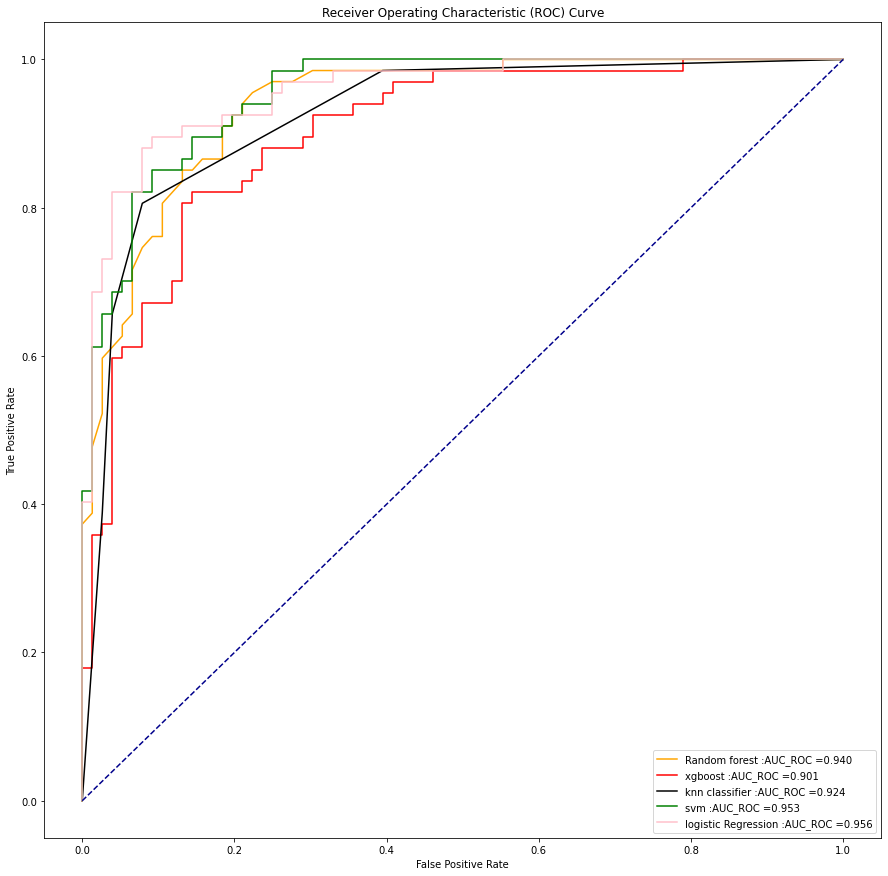

In [201]:
plt.figure(figsize=(15,15))
plot_roc_curve(rf_fpr, rf_tpr)

## Therefore we can say that logistic regression and svm model's performance is same for my data in comparison to other ML algorithms.